# Manipulate a function
Tutorial by Johannes Stoljar, Tobias Thummerer

## License
Copyright (c) 2021 Tobias Thummerer, Lars Mikelsons, Josef Kircher, Johannes Stoljar

Licensed under the MIT license. See [LICENSE](https://github.com/thummeto/FMI.jl/blob/main/LICENSE) file in the project root for details.

## Motivation
This Julia Package *FMI.jl* is motivated by the use of simulation models in Julia. Here the FMI specification is implemented. FMI (*Functional Mock-up Interface*) is a free standard ([fmi-standard.org](http://fmi-standard.org/)) that defines a container and an interface to exchange dynamic models using a combination of XML files, binaries and C code zipped into a single file. The user can thus use simulation models in the form of an FMU (*Functional Mock-up Units*). Besides loading the FMU, the user can also set values for parameters and states and simulate the FMU both as co-simulation and model exchange simulation.

## Introduction to the example
This example shows how to overwrite a library function with an own function. For this the FMU model is simulated first without changes. Then the function `fmi2GetReal()` is overwritten and simulated again. Both simulations are displayed in a graph to show the change caused by overwriting the function. The model used is a one-dimensional spring pendulum with friction. The object-orientated structure of the *SpringFrictionPendulum1D* can be seen in the following graphic.

![svg](https://github.com/thummeto/FMI.jl/blob/main/docs/src/examples/pics/SpringFrictionPendulum1D.svg?raw=true)  


## Target group
The example is primarily intended for users who work in the field of simulations. The example wants to show how simple it is to use FMUs in Julia.


## Other formats
Besides, this [Jupyter Notebook](https://github.com/thummeto/FMI.jl/blob/examples/examples/manipulation.ipynb) there is also a [Julia file](https://github.com/thummeto/FMI.jl/blob/examples/examples/manipulation.jl) with the same name, which contains only the code cells and for the documentation there is a [Markdown file](https://github.com/thummeto/FMI.jl/blob/examples/examples/manipulation.md) corresponding to the notebook.  


## Getting started

### Installation prerequisites
|     | Description                       | Command                   | Alternative                                    |   
|:----|:----------------------------------|:--------------------------|:-----------------------------------------------|
| 1.  | Enter Package Manager via         | ]                         |                                                |
| 2.  | Install FMI via                   | add FMI                   | add " https://github.com/ThummeTo/FMI.jl "     |
| 3.  | Install FMIZoo via                | add FMIZoo                | add " https://github.com/ThummeTo/FMIZoo.jl "  |
| 4.  | Install FMICore via               | add FMICore               | add " https://github.com/ThummeTo/FMICore.jl " |
| 5.  | Install Plots via                 | add Plots                 |                                                |

## Code section

To run the example, the previously installed packages must be included. 

In [1]:
# imports
using FMI
using FMIZoo
using FMICore
using Plots

### Simulation setup

Next, the start time and end time of the simulation are set.

In [2]:
tStart = 0.0
tStop = 8.0

8.0

### Import FMU

In the next lines of code the FMU model from *FMIZoo.jl* is loaded and the information about the FMU is shown.

In [3]:
# we use an FMU from the FMIZoo.jl
pathToFMU = get_model_filename("SpringFrictionPendulum1D", "Dymola", "2022x")

myFMU = fmiLoad(pathToFMU)

fmiInfo(myFMU)

┌ Info: fmi2Unzip(...): Successfully unzipped 153 files at `/tmp/fmijl_BsXEwZ/SpringFrictionPendulum1D`.
└ @ FMIImport /home/runner/.julia/packages/FMIImport/oQYco/src/FMI2_ext.jl:76
┌ Info: fmi2Load(...): FMU resources location is `file:////tmp/fmijl_BsXEwZ/SpringFrictionPendulum1D/resources`
└ @ FMIImport /home/runner/.julia/packages/FMIImport/oQYco/src/FMI2_ext.jl:192
┌ Info: fmi2Load(...): FMU supports both CS and ME, using CS as default if nothing specified.
└ @ FMIImport /home/runner/.julia/packages/FMIImport/oQYco/src/FMI2_ext.jl:195


#################### Begin information for FMU ####################
	Model name:			SpringFrictionPendulum1D
	FMI-Version:			2.0
	GUID:				{2e178ad3-5e9b-48ec-a7b2-baa5669efc0c}
	Generation tool:		Dymola Version 2022x (64-bit), 2021-10-08
	Generation time:		2022-05-19T06:54:12Z
	Var. naming conv.:		structured
	Event indicators:		24
	Inputs:				0
	Outputs:			0
	States:				2
		33554432 ["mass.s"]
		33554433 ["mass.v", "mass.v_relfric"]
	Supports Co-Simulation:		true
		Model identifier:	SpringFrictionPendulum1D
		Get/Set State:		true
		Serialize State:	true
		Dir. Derivatives:	true
		Var. com. steps:	true
		Input interpol.:	true
		Max order out. der.:	1
	Supports Model-Exchange:	true
		Model identifier:	SpringFrictionPendulum1D
		Get/Set State:		true
		Serialize State:	true
		Dir. Derivatives:	true
##################### End information for FMU #####################


### Simulate FMU

In the next steps the recorded value is defined. The recorded value is the position of the mass. In the function `fmiSimulateME()` the FMU is simulated in model-exchange mode (ME) with an adaptive step size. In addition, the start and end time and the recorded variables are specified.

In [4]:
vrs = ["mass.s"]

simData = fmiSimulateME(myFMU, tStart, tStop; recordValues=vrs)

Simulating ME-FMU ... 100%|██████████████████████████████| Time: 0:00:12


Model name:
	SpringFrictionPendulum1D
Success:
	true
States [110]:
	0.0	[0.5, 0.0]
	2.3529411764719727e-11	[0.5, 1.0e-10]
	1.0000023529411766e-5	[0.5000000002125017, 4.250030186348503e-5]
	0.00011000002352941177	[0.5000000257134062, 0.0004675245102952289]
	0.0011100000235294118	[0.5000026191281834, 0.004719970360497647]
	0.011110000023529413	[0.5002631686645611, 0.047449647283752144]
	0.03982466736770743	[0.5034050123596227, 0.17168075110950387]
	0.09972054285078226	[0.5215006197560228, 0.43204954153497455]
	0.16481836271111422	[0.5585747156842935, 0.703758265932321]
	...
	8.0	[1.0668213438183276, -1.0000099359121942e-10]
Values [110]:
	0.0	(0.5,)
	2.3529411764719727e-11	(0.5,)
	1.0000023529411766e-5	(0.5000000002125017,)
	0.00011000002352941177	(0.5000000257134062,)
	0.0011100000235294118	(0.5000026191281834,)
	0.011110000023529413	(0.5002631686645611,)
	0.03982466736770743	(0.5034050123596227,)
	0.09972054285078226	(0.5215006197560228,)
	0.16481836271111422	(0.5585747156842935,)
	...

### Plotting FMU

After the simulation is finished, the result of the FMU for the model-exchange mode can be plotted. In the plot for the FMU it can be seen that the oscillation continues to decrease due to the effect of the friction. If you simulate long enough, the oscillation comes to a standstill in a certain time.

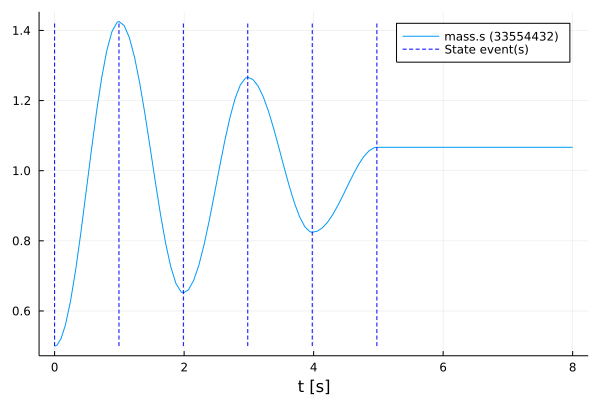

In [5]:
fig = fmiPlot(simData, states=false)

### Override Function

After overwriting a function, the previous one is no longer accessible. The original function `fmi2GetReal()` is cached by storing the address of the pointer. The addresses of the pointers are kept in the FMU and are thus accessible.

In [6]:
# save, where the original `fmi2GetReal` function was stored, so we can access it in our new function
originalGetReal = myFMU.cGetReal

Ptr{Nothing} @0x00007fa33b45afaf

To overwrite the function `fmi2GetReal!()`, the function header of the new custom function must be identical to the previous one. The function header looks like `fmi2GetReal!(cfunc::Ptr{Nothing}, c::fmi2Component, vr::Union{Array{fmi2ValueReference}, Ptr{fmi2ValueReference}}, nvr::Csize_t, value::Union{Array{fmi2Real}, Ptr{fmi2Real}})::fmi2Status`. The information how the FMI2 function are structured can be seen from [FMICore.jl](https://github.com/ThummeTo/FMICore.jl/blob/main/src/FMI2_c.jl#L718) or the FMI2.0.3-specification.

In the new implementation the original function is called by the previously stored pointer. Next there is a special handling if `value` is a pointer to an array. In this case the pointer is treated as an array, so that the entries are accessible. Otherwise, each value in `value` is multiplied by two. Finally, the original state of the original function is output.

In [7]:
function myGetReal!(c::fmi2Component, vr::Union{Array{fmi2ValueReference}, Ptr{fmi2ValueReference}}, 
                    nvr::Csize_t, value::Union{Array{fmi2Real}, Ptr{fmi2Real}})
    # first, we do what the original function does
    status = fmi2GetReal!(originalGetReal, c, vr, nvr, value)

    # if we have a pointer to an array, we must interprete it as array to access elements
    if isa(value, Ptr{fmi2Real})
        value = unsafe_wrap(Array{fmi2Real}, value, nvr, own=false)
    end

    # now, we multiply every value by two (just for fun!)
    for i in 1:nvr 
        value[i] *= 2.0 
    end 

    # return the original status
    return status
end

myGetReal! (generic function with 1 method)

In the next command the original function is overwritten with the new defined function, for which the command `fmiSetFctGetReal()` is called.

In [8]:
# no we overwrite the original function
fmiSetFctGetReal(myFMU, myGetReal!)

Ptr{Nothing} @0x00007fa387fbcfc0

### Simulate and Plot FMU with modified function

As before, the identical command is called here for simulation. This is also a model exchange simulation. Immediately afterwards, the results are added to the previous graph as a dashed line.

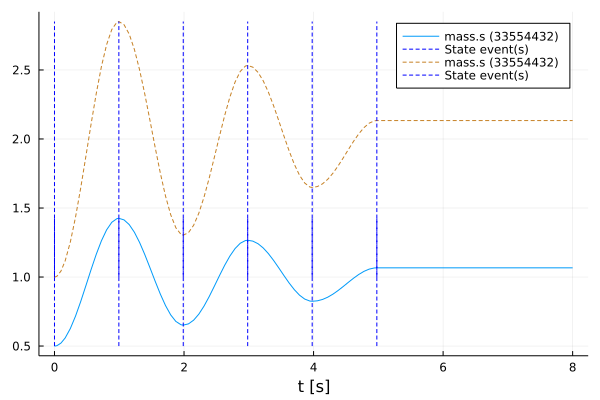

In [9]:
simData = fmiSimulateME(myFMU, tStart, tStop; recordValues=vrs)
fmiPlot!(fig, simData; states=false, style=:dash)

As expected by overwriting the function, all values are doubled.

### Unload FMU

After plotting the data, the FMU is unloaded and all unpacked data on disc is removed.

In [10]:
fmiUnload(myFMU)

### Summary

In this tutorial it is shown how an existing function of the library can be replaced by an own implementation. Through this possibility, there are almost no limits for the user, whereby the user can customize the function to his liking.